In [3]:
import dask
from dask.distributed import Client, wait
from dask import delayed

client = Client(n_workers=7, threads_per_worker=1) 
#client = Client()

client

/g/data/xp65/public/apps/med_conda/envs/analysis3-24.12/lib/python3.11/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34493 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/34493/status,
Dashboard: /proxy/34493/status,Workers: 7
Total threads: 7,Total memory: 63.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39033,Workers: 7
Dashboard: /proxy/34493/status,Total threads: 7
Started: Just now,Total memory: 63.00 GiB
Comm: tcp://127.0.0.1:41857,Total threads: 1
Dashboard: /proxy/37129/status,Memory: 9.00 GiB
Nanny: tcp://127.0.0.1:41193,


In [1]:
#import all the stuff
from netCDF4 import Dataset
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import sys
sys.path.append("/g/data/mn51/users/nb6195/project/gwls/")
import gwl

In [2]:
#Set parameters
CMIP='CMIP6'
#AGENCY = 'CSIRO' 
#RCM = 'CCAM-v2203-SN'
AGENCY = 'BOM' 
RCM = 'BARPA-R'

#GCM = 'ACCESS-CM2' #ensemble = 'r4i1p1f1' #Done
#GCM = 'ACCESS-ESM1-5' #ensemble = 'r6i1p1f1' #Done
#GCM = 'EC-Earth3' ensemble = 'r1i1p1f1' #Done
#GCM = 'MPI-ESM1-2-HR' ensemble = 'r1i1p1f1' #BOM done, no CSIRO
#GCM = 'CESM2' ensemble = 'r11i1p1f1' #Done
GCM = 'CMCC-ESM2' 
ensemble = 'r1i1p1f1' #Done
#GCM = 'NorESM2-MM' ensemble = 'r1i1p1f1' #Done
#GCM = 'CNRM-ESM2-1' ensemble = 'r1i1p1f2' #CSIRO Done, no BOM

#pathway = 'ssp126'
pathway = 'ssp370'

ddir = f"/g/data/kj66/CORDEX/output/{CMIP}/DD/AUST-05i/{AGENCY}/{GCM}"
output_dir = '/g/data/ia39/ncra/bushfire/dwi/'
#output_dir_mm = '/g/data/ia39/ncra/bushfire/dwi/monthly_mean/'

In [3]:
infiles12=f"/g/data/ia39/ncra/bushfire/dwi/{GCM}/{pathway}/{ensemble}/{RCM}/v1-r1/day/{pathway}_{GCM}_{RCM}_gwl1.2_dwi.nc"
dwi_data_12 = xr.open_dataset(infiles12)['__xarray_dataarray_variable__']
infiles15=f"/g/data/ia39/ncra/bushfire/dwi/{GCM}/{pathway}/{ensemble}/{RCM}/v1-r1/day/{pathway}_{GCM}_{RCM}_gwl1.5_dwi.nc"
dwi_data_15 = xr.open_dataset(infiles15)['__xarray_dataarray_variable__']
infiles20=f"/g/data/ia39/ncra/bushfire/dwi/{GCM}/{pathway}/{ensemble}/{RCM}/v1-r1/day/{pathway}_{GCM}_{RCM}_gwl2.0_dwi.nc"
dwi_data_20 = xr.open_dataset(infiles20)['__xarray_dataarray_variable__']
infiles30=f"/g/data/ia39/ncra/bushfire/dwi/{GCM}/{pathway}/{ensemble}/{RCM}/v1-r1/day/{pathway}_{GCM}_{RCM}_gwl3.0_dwi.nc"
dwi_data_30 = xr.open_dataset(infiles30)['__xarray_dataarray_variable__']

In [4]:
ff_infiles12=f"/g/data/ia39/ncra/bushfire/dwi/{GCM}/{pathway}/{ensemble}/{RCM}/v1-r1/day/{pathway}_{GCM}_{RCM}_gwl1.2_faux_ffdi.nc"
faux_ffdi_data_12 = xr.open_dataset(ff_infiles12)['__xarray_dataarray_variable__']
ff_infiles15=f"/g/data/ia39/ncra/bushfire/dwi/{GCM}/{pathway}/{ensemble}/{RCM}/v1-r1/day/{pathway}_{GCM}_{RCM}_gwl1.5_faux_ffdi.nc"
faux_ffdi_data_15 = xr.open_dataset(ff_infiles15)['__xarray_dataarray_variable__']
ff_infiles20=f"/g/data/ia39/ncra/bushfire/dwi/{GCM}/{pathway}/{ensemble}/{RCM}/v1-r1/day/{pathway}_{GCM}_{RCM}_gwl2.0_faux_ffdi.nc"
faux_ffdi_data_20 = xr.open_dataset(ff_infiles20)['__xarray_dataarray_variable__']
ff_infiles30=f"/g/data/ia39/ncra/bushfire/dwi/{GCM}/{pathway}/{ensemble}/{RCM}/v1-r1/day/{pathway}_{GCM}_{RCM}_gwl3.0_faux_ffdi.nc"
faux_ffdi_data_30 = xr.open_dataset(ff_infiles30)['__xarray_dataarray_variable__']

In [5]:
pf_infiles12=f"/g/data/ia39/ncra/bushfire/dwi/{GCM}/{pathway}/{ensemble}/{RCM}/v1-r1/day/{pathway}_{GCM}_{RCM}_gwl1.2_p_ffdi.nc"
p_ffdi_data_12 = xr.open_dataset(pf_infiles12)['__xarray_dataarray_variable__']
pf_infiles15=f"/g/data/ia39/ncra/bushfire/dwi/{GCM}/{pathway}/{ensemble}/{RCM}/v1-r1/day/{pathway}_{GCM}_{RCM}_gwl1.5_p_ffdi.nc"
p_ffdi_data_15 = xr.open_dataset(pf_infiles15)['__xarray_dataarray_variable__']
pf_infiles20=f"/g/data/ia39/ncra/bushfire/dwi/{GCM}/{pathway}/{ensemble}/{RCM}/v1-r1/day/{pathway}_{GCM}_{RCM}_gwl2.0_p_ffdi.nc"
p_ffdi_data_20 = xr.open_dataset(pf_infiles20)['__xarray_dataarray_variable__']
pf_infiles30=f"/g/data/ia39/ncra/bushfire/dwi/{GCM}/{pathway}/{ensemble}/{RCM}/v1-r1/day/{pathway}_{GCM}_{RCM}_gwl3.0_p_ffdi.nc"
p_ffdi_data_30 = xr.open_dataset(pf_infiles30)['__xarray_dataarray_variable__']

In [6]:
faux_ffdi_data_30

<xarray.DataArray '__xarray_dataarray_variable__' (time: 7300, lat: 691,
                                                   lon: 886)> Size: 18GB
[4469249800 values with dtype=float32]
Coordinates:
  * time     (time) object 58kB 2054-01-01 12:00:00 ... 2073-12-31 12:00:00
  * lat      (lat) float64 6kB -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
Attributes: (12/14)
    creator_institution:    Bureau of Meteorology
    long_name:              Faux FFDI computed from tasmax, hursmin, maximum ...
    summary:                Fire weather metric: faux_ffdi for Global Warming...
    institution:            Bureau of Meteorology
    program:                Australian Climate Service (ACS)
    standard_name:          faux_ffdi
    ...                     ...
    creator_type:           institution
    naming_authority:       Bureau of Meteorology
    publisher_type:         group
    publisher_institution:  Bureau of Meteorology
    institute_id:           BOM
    publisher_url:          http://www.bom.gov.au

In [30]:
#conversion factor to FFDI from Kevin
#Psudo FFDI: (50/3)*(DF/10) matching FFDI for a particular event provided by Musa, 30 Sept 2023
#also computed for mean T humidity for Melb airport for Feb for total obs history at that time
#this removes the wind speed bias - FFDI undersensitive to wind and over sensitive to temp, 
#they often compensate. But not great on cool windy days
#Faux FFDI: (T + 12)(DF/10)/2 
#s = 50/3

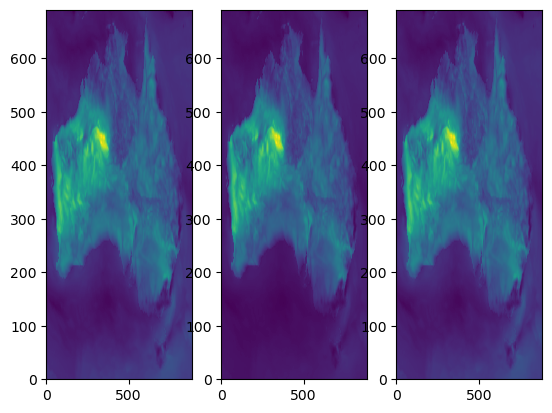

In [11]:
fh, axes = plt.subplots(ncols = 3)
axes[0].pcolormesh(dwi_data_30[5])
axes[1].pcolormesh(faux_ffdi_data_30[5])
ph=axes[2].pcolormesh(p_ffdi_data_30[5])
#plt.colorbar(ph)

#plt.imshow(faux_data_12[5], origin='lower')
#plt.colorbar()

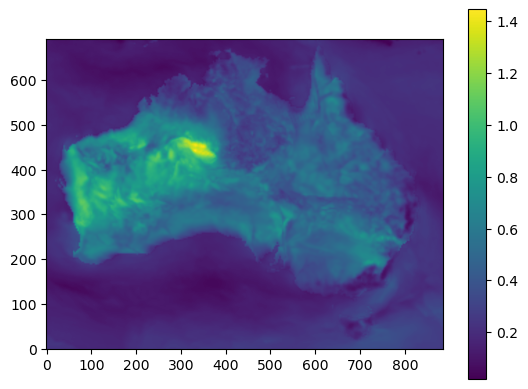

In [12]:
plt.imshow(dwi_data_30[5], origin='lower')
plt.colorbar()

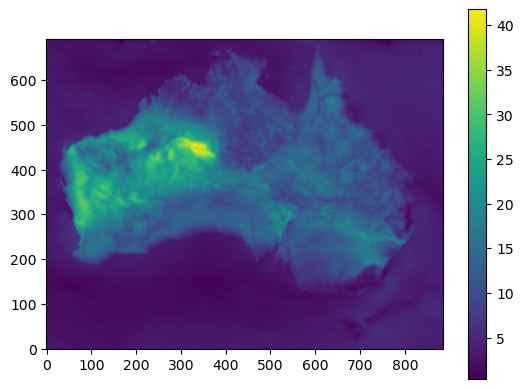

In [13]:
plt.imshow(faux_ffdi_data_30[5], origin='lower')
plt.colorbar()

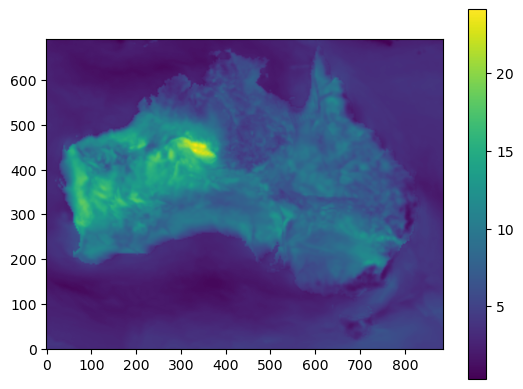

In [14]:
plt.imshow(p_ffdi_data_30[5], origin='lower')
plt.colorbar()